In [1]:
# Importing important libraries for Data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

In [2]:
insdf = pd.read_csv('insurance.csv')

In [3]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
insdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Univariate Analysis

In [7]:
# We do not have ambiguity in the dataset so we are good to start visualizing it.


insdf.groupby(by=insdf.sex).min()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,18,16.815,0,no,northeast,1607.5101
male,18,15.960,0,no,northeast,1121.8739


In [8]:
insdf.groupby(by=insdf.sex).max()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,64,48.07,5,yes,southwest,63770.42801
male,64,53.13,5,yes,southwest,62592.87309


In [9]:
insdf.groupby(by=insdf.smoker).min()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,18,female,15.960,0,northeast,1121.8739
yes,18,female,17.195,0,northeast,12829.4551


In [10]:
insdf.groupby(by=insdf.smoker).max()   

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,64,male,53.13,5,southwest,36910.60803
yes,64,male,52.58,5,southwest,63770.42801


In [11]:
insdf.groupby(by=insdf.smoker).mean()   

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [12]:
insdf.groupby(by=insdf.children).mean()

,age,bmi,charges
children,,,
0,38.444251,30.550296,12365.975602
1,39.453704,30.623148,12731.171832
2,39.445833,30.978104,15073.563734
3,41.566879,30.684331,15355.318367
4,39.000000,31.391200,13850.656311
5,35.611111,29.605000,8786.035247


Text(0.5, 1.0, 'Number of Smokers')

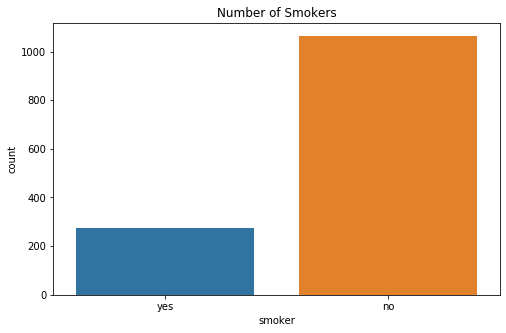

In [13]:
# Visualizing the count of smokers and genders in the dataset
plt.figure(figsize=(8,5))
sns.countplot(insdf.smoker)
plt.title('Number of Smokers')

Text(0.5, 1.0, 'Number of Regions')

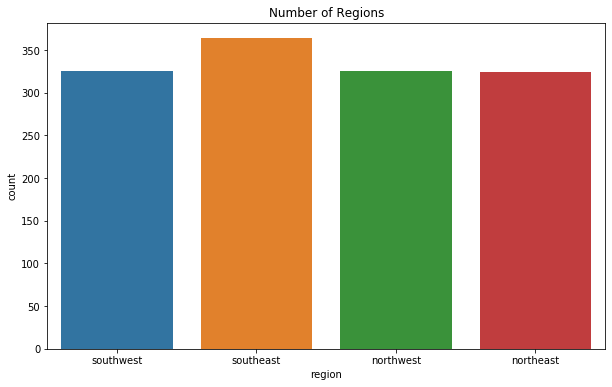

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(insdf.region)
plt.title('Number of Regions')

Text(0.5, 1.0, 'Number of Children')

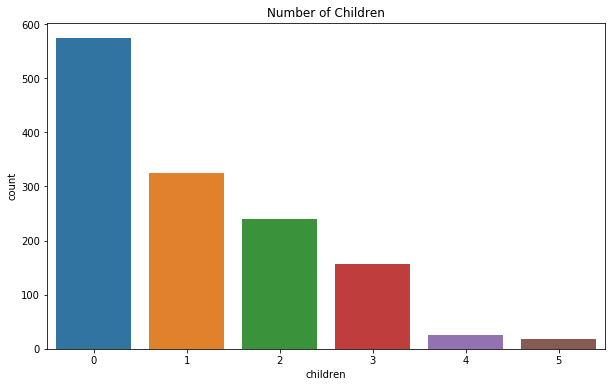

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(insdf.children)
plt.title('Number of Children')

In [16]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
insdf.age.nunique()

47

In [18]:
insdf.groupby(by=insdf.age).max()[insdf.groupby(by=insdf.age).max()['charges']>50000]

,sex,bmi,children,smoker,region,charges
age,,,,,,
28,male,38.060,5,yes,southwest,51194.55914
31,male,39.490,5,yes,southwest,58571.07448
33,male,42.940,5,yes,southwest,55135.40209
45,male,39.995,5,yes,southwest,62592.87309
52,male,47.740,5,yes,southwest,60021.39897
54,male,47.410,3,yes,southwest,63770.42801
60,male,40.920,3,yes,southwest,52590.82939


Text(0.5, 1.0, 'Distribution of BMI')

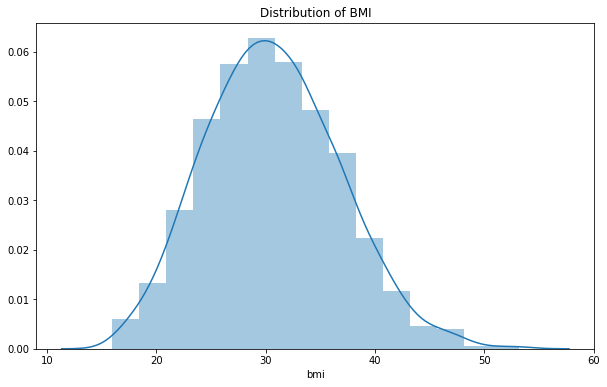

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(insdf.bmi, bins=15)
plt.title('Distribution of BMI')

In [20]:
insdf.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [21]:
insdf.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [22]:
# Checking out outliers in the data using z-score method

def outlier_detector(data):
    outliers = []
    zscore = []
    min_val = 3
    for i in data:
        score = (i-np.mean(data))/np.std(data)
        zscore.append(zscore)
        
        if np.abs(score)>min_val:    
            outliers.append(i)

    return len(outliers), outliers

In [23]:
insdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
age_no_of_outliers, age_outliers = outlier_detector(insdf.age)

In [25]:
print(age_no_of_outliers, age_outliers)

0 []


In [26]:
bmi_no_of_outliers, bmi_outliers = outlier_detector(insdf.bmi)

In [27]:
print(bmi_no_of_outliers, bmi_outliers)

4 [49.06, 50.38, 52.58, 53.13]


In [28]:
insdf[insdf.bmi.isin(bmi_outliers)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [29]:
charges_no_of_outliers, charges_outliers = outlier_detector(insdf.charges)

In [30]:
print(charges_no_of_outliers, charges_outliers)

7 [51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


In [31]:
insdf[insdf.charges.isin(charges_outliers)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


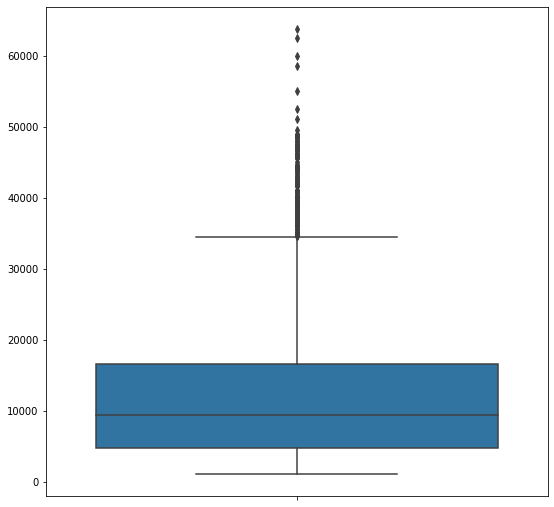

In [32]:
# Visualizing the outliers using boxplots

plt.figure(figsize=(9,9))
sns.boxplot(insdf[['charges']], orient='v')

# There are many outliers in charges column that can interfere with our predictions

In [33]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
insdf= insdf[~insdf.charges.isin(charges_outliers)]

In [35]:
insdf.shape

(1331, 7)

### Bivariate Analysis

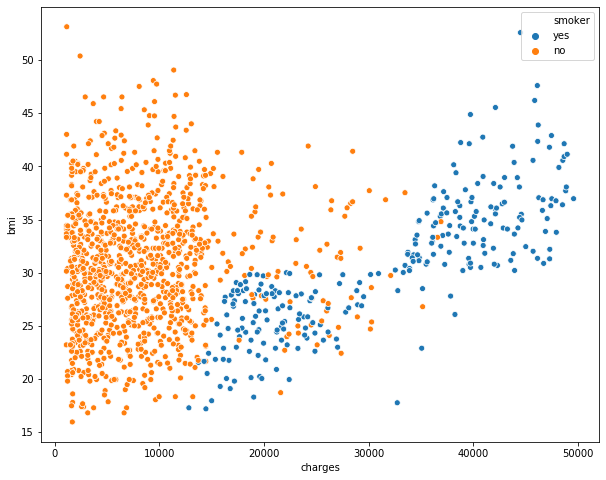

In [36]:
# Let's check how bmi is scattered with respect to charges in the dataset
fig = plt.figure(figsize=(10,8))
sns.scatterplot(insdf.charges, insdf.bmi, hue=insdf.smoker)

Text(0.5, 1.0, 'Number of Regions')

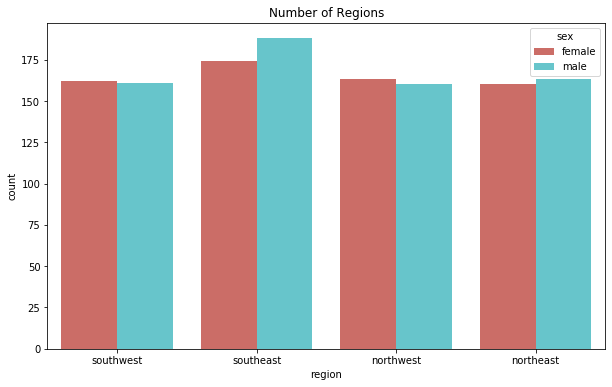

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(insdf.region, hue=insdf.sex, palette="hls" )
plt.title('Number of Regions')

Text(0.5, 1.0, 'Number of Regions')

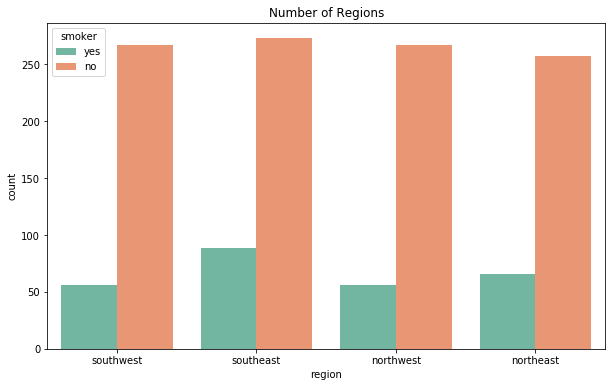

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(insdf.region, hue=insdf.smoker, palette='Set2')
plt.title('Number of Regions')

In [39]:
# checking the synergy effect of different predictors and knowing the correlation in between
correlation=insdf[['age','bmi','children','charges']].corr()
correlation

,age,bmi,children,charges
age,1.000000,0.108331,0.043197,0.304561
bmi,0.108331,1.000000,0.014860,0.187061
children,0.043197,0.014860,1.000000,0.076993
charges,0.304561,0.187061,0.076993,1.000000


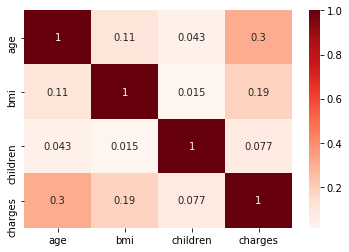

In [40]:
sns.heatmap(correlation, annot=True, cmap='Reds')

### Predictive Analysis

In [41]:
# Handling categorical data

insdf.sex = insdf.sex.apply(lambda x : 1 if x == 'female' else 0)

In [42]:
insdf.smoker = insdf.smoker.apply(lambda x : 1 if x == 'yes' else 0)

In [43]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [44]:
region = pd.get_dummies(insdf.region, prefix = 'region')

In [45]:
region.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [46]:
region.shape

(1331, 4)

In [47]:
insdf = pd.concat([insdf, region],axis=1)

In [48]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0


In [49]:
insdf.drop(['region'],axis=1,inplace= True)

In [50]:
insdf.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [51]:
# Splitting train and test data

from sklearn.model_selection import train_test_split

train,test = train_test_split(insdf, train_size = 0.7, test_size = 0.3, random_state = 300 )

In [52]:
train.shape

(931, 10)

In [53]:
test.shape

(400, 10)

In [54]:
# Rescaling additional features with minmax scalar

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

In [55]:
train[['charges','bmi','age']] = scalar.fit_transform(train[['charges','bmi','age']])

D:\Anaconda Navigator\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda Navigator\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
train.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
2,0.217391,0,0.482199,3,0,0.068673,0,0,1,0
959,0.652174,0,0.591539,1,0,0.564371,0,1,0,0
342,0.913043,1,0.319827,0,0,0.249614,1,0,0,0
1024,0.630435,1,0.849248,1,0,0.153707,0,0,1,0
1161,0.347826,0,0.754208,2,0,0.082597,0,0,1,0


In [57]:
y_train = train.pop('charges')

In [58]:
X_train = train

In [59]:
X_train.shape

(931, 9)

In [60]:
y_train.shape

(931,)

In [61]:
y_test = test.pop('charges')

In [62]:
X_test = test

### Building the model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = lr.predict(X_test)

In [70]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_test,y_pred)

-1.3292272170276318

In [72]:
X_train_a= X_train.copy()

In [73]:
#adding constant variable

import statsmodels.api as sm

X_train_new=sm.add_constant(X_train_a)

#running the modal

lm=sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     370.1
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          9.92e-282
Time:                        18:05:22   Log-Likelihood:                 681.36
No. Observations:                 931   AIC:                            -1345.
Df Residuals:                     922   BIC:                            -1301.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0515      0.010  

D:\Anaconda Navigator\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
